Anomaly value counts (-1 = anomaly, 1 = normal):
Anomaly
 1    52967
-1      536
Name: count, dtype: int64


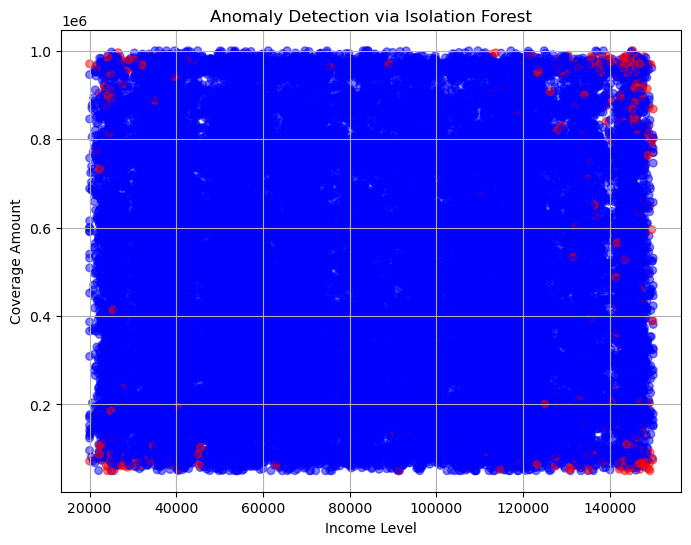

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

features = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

isoforest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly'] = isoforest.fit_predict(scaled_features)

print("Anomaly value counts (-1 = anomaly, 1 = normal):")
print(df['Anomaly'].value_counts())

plt.figure(figsize=(8, 6))
colors = df['Anomaly'].map({1: 'blue', -1: 'red'})
plt.scatter(df['Income Level'], df['Coverage Amount'], c=colors, s=30, alpha=0.5)
plt.xlabel('Income Level')
plt.ylabel('Coverage Amount')
plt.title('Anomaly Detection via Isolation Forest')
plt.grid(True)
plt.show()